<a href="https://colab.research.google.com/github/OmarAboElnaga/Students-Score-and-their-Habits/blob/main/Students'_Scores_and_their_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency



In [2]:
df =pd.read_csv( "https://raw.githubusercontent.com/OmarAboElnaga/Students-Score-and-their-Habits/main/student_habits_performance.csv")
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
df = df.drop('parental_education_level', axis=1)

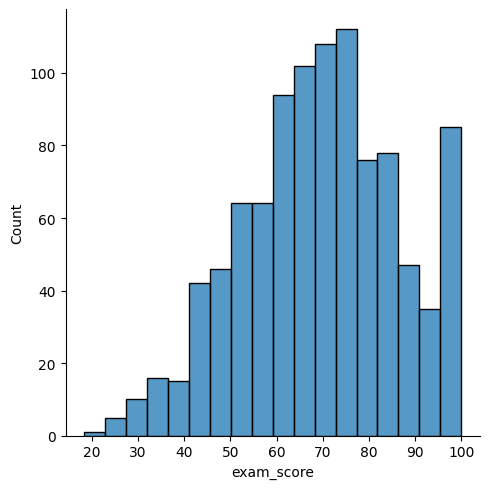

In [7]:
sns.displot(df.exam_score)

In [8]:
def group_exam_scores(df, score_column='exam_score'):
    bins = [0, 50, 60, 70, 80, 90, 99.9,100]
    labels = ['F', 'D', 'C', 'B', 'A', 'A+','Full Mark']
    df['score_group'] = pd.cut(df[score_column], bins=bins, labels=labels, right=True, include_lowest=True)
    return df
df = group_exam_scores(df)
print(df['score_group'].value_counts())

score_group
B            234
C            208
D            151
A            151
F            131
A+            77
Full Mark     48
Name: count, dtype: int64


In [9]:
df['Wasted_Time'] = df['netflix_hours']+ df['social_media_hours']

In [10]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,score_group,Wasted_Time
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2,D,2.3
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0,Full Mark,5.1
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3,F,4.4
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8,F,4.9
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4,C,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1,B,2.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9,C,3.4
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,64.4,C,3.9
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,69.7,C,5.2


In [11]:
df.to_csv("examScores.csv", index=False)

## Hypothesis Testing

#### 1st Test
###### Mean Mental Health Rating Grouped by Gender
###### Test Used : Independent Samples t-Test (One-tailed)
###### Null Hypothesis : There is no difference in average mental health rating between males and females.
###### Alternative Hypothesis : Males have a higher average mental health rating than females.


In [ ]:
male_mental = df[df['gender'] == 'Male']['mental_health_rating']
female_mental = df[df['gender'] == 'Female']['mental_health_rating']
t_stat, p_val = ttest_ind(male_mental, female_mental, alternative='greater', nan_policy='omit')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -0.18384179790332056
p-value: 0.572911724702841


Fail to reject null hypothesis.


#### 2nd Test
##### Mean exam Score Across types of Diet Qualities
##### Test Used: Anova Test
##### Null hypothesis: Mean exam scores are equal across levels of diet_quality
##### Alternative hypothesis: Mean exam scores are different across different types of diet qualities

In [ ]:
diet_groups = [group['exam_score'].dropna() for name, group in df.groupby('diet_quality')]
f_stat, p_val = f_oneway(*diet_groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 1.2662049986695567
p-value: 0.28235232253240805


Fail to reject null hypothesis.


#### 3rd Test
##### Correlation between daily study hours and exam score
##### Test Used: Pearson
##### Null hypothesis: There is no correlation between daily study hours and exam score
##### Alternative hypothesis: There is a positive correlation between daily study hours and exam score


In [ ]:
study_hours = df['study_hours_per_day']
exam_scores = df['exam_score']
correlation, p_val = pearsonr(study_hours, exam_scores)

print("Correlation coefficient:", correlation)
print("p-value:", p_val)

Correlation coefficient: 0.8254185093960442
p-value: 4.595701453345048e-250


Reject null hypothesis: Positive correlation exists.

#### 4th Test
##### To check if Gender and diet Qualities are independent variables
##### Test Used: Chi-Square Test of Independence
##### Null hypothesis: Gender and diet quality are independent (no association).
##### Alternative hypothesis: Gender and diet quality are associated (dependent).



In [ ]:
gender_diet_contingency_table = pd.crosstab(df['gender'], df['diet_quality'])
chi2_stat, p_val, dof, expected = chi2_contingency(gender_diet_contingency_table)

print(gender_diet_contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)

diet_quality  Fair  Good  Poor
gender                        
Female         210   179    92
Male           209   185    83
Other           18    14    10
Chi-Square Statistic: 1.449938851724732
p-value: 0.8354706170451184


Since P-Value is 0.8 which is greater than 0.05 so we failed to reject the null hypothesis

#### 5th test
##### Correlation between Mental health rating and exam score
##### Test Used: Pearson
##### Null hypothesis: There is no correlation between mental health rating and exam score.
##### Alternative hypothesis: Mental health rating is positively related correlated with the final exam score.

In [12]:
mental_health = df['mental_health_rating']
exam_scores = df['exam_score']
correlation, p_val = pearsonr(mental_health, exam_scores)

print("Correlation coefficient:", correlation)
print("p-value:", p_val)

Correlation coefficient: 0.32152293065514603
p-value: 1.752646701164105e-25


Since the P-value is extremely small we can successfully reject the null hypothesis and that there is an positive correlation

#### 6th test
##### Correlation between daily Wasted time and Final exam score
##### Test Used: Pearson
##### Null hypothesis: There is no correlation between daily wasted time and final exam score
##### Alternative hypothesis: Daily wasted time is negatively correlated with final exam score

In [13]:
time_wasted = df['Wasted_Time']
exam_scores = df['exam_score']
correlation, p_val = pearsonr(time_wasted, exam_scores)

print("Correlation coefficient:", correlation)
print("p-value:", p_val)

Correlation coefficient: -0.23763123167240488
p-value: 2.6473295497128505e-14


Since the P-value is extremely small we can successfully reject the null hypothesis and that there is an negative correlation